# Introduction to Bayesian Statistics and Bayesian Transformation

## 1. Bayes Theorem

Bayes’ theorem describes how to update the probability of a **hypothesis (A)** given some **evidence (B)**.

$$
P(A|B) = \frac{P(B|A)P(A)}{P(B)}
$$

Where:
- $P(A|B)$: Posterior — probability of the hypothesis after seeing evidence
- $P(B|A)$: Likelihood — probability of observing evidence if H is true
- $P(A)$: Prior — our initial belief about H
- $P(B)$: Evidence — total probability of the evidence

Let's do an example! 

We want to estimate the probability that a developer writes high-quality code (A) given that they train their coding skills frequently (B).

In [1]:
P_high_quality = 0.3  # Prior - P(A)
P_low_quality = 1 - P_high_quality

P_training_given_high = 0.8  # Likelihood - P(B|A)
P_training_given_low = 0.4  # P(B|not A)

# Total probability of attending training (Evidence - P(B))
P_training = (P_training_given_high * P_high_quality) + (P_training_given_low * P_low_quality)

# Bayes' theorem
P_high_given_training = (P_training_given_high * P_high_quality) / P_training

print(
    f"There's a {P_high_given_training * 100:.2f}% chance that a developer with frequent training writes high-quality code."
)

There's a 46.15% chance that a developer with frequent training writes high-quality code.


Lets visualize it!

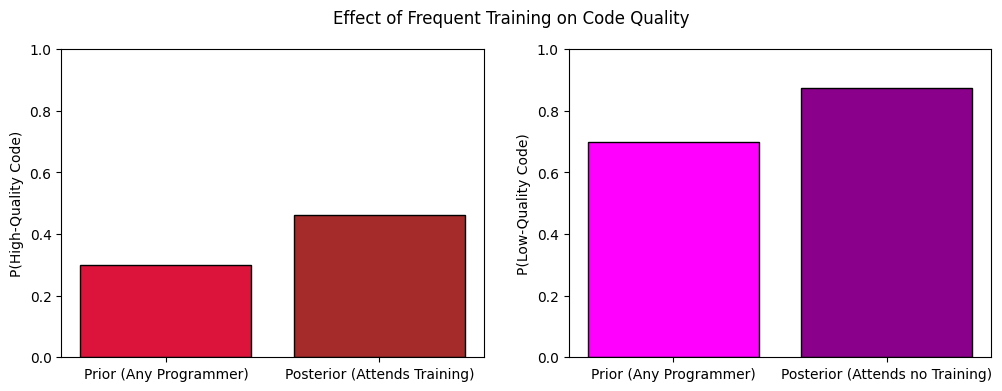

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle("Effect of Frequent Training on Code Quality")

# High Quality Code
categories = ["Prior (Any Programmer)", "Posterior (Attends Training)"]
probabilities = [P_high_quality, P_high_given_training]
ax[0].bar(categories, probabilities, color=["crimson", "brown"], edgecolor="k")
ax[0].set_ylim(0, 1)
ax[0].set_ylabel("P(High-Quality Code)")

# Low Quality
categories = ["Prior (Any Programmer)", "Posterior (Attends no Training)"]
P_no_training = 1 - P_training
P_no_training_given_low = 1 - P_training_given_low
P_low_given_training = (P_no_training_given_low * P_low_quality) / P_no_training
probabilities = [P_low_quality, P_low_given_training]
ax[1].bar(categories, probabilities, color=["magenta", "darkmagenta"], edgecolor="k")
ax[1].set_ylim(0, 1)
ax[1].set_ylabel("P(Low-Quality Code)")
plt.show()

## 2. Bayesian Inference
Bayesian Inference is a generalization of Bayes Theorem to more complex problems, meaning scenarios with multiple parameters instead of one measurable quantity.

For parameters $\theta$ = ($\theta_1$, $\theta_1$, …, $\theta_n$):

$$
P(θ|D) \sim P(D|θ)P(θ)
$$

- $P(θ)$: Prior (joint distribution)
- $P(D|θ)$: Likelihood
- $P(θ|D)$: Posterior — updated beliefs after observing data

Because the parameters $\theta$ are independent we can rewrite it as:

$$
P(\theta_1, \theta_1, …, \theta_n|D) \sim P(D|\theta_1, \theta_1, …, \theta_n)P(\theta_1)P(\theta_2)...P(\theta_n)
$$

For that purpose we give an example where we want to estimate the mean and the standard deviation of a normal distribution from synthetic data.

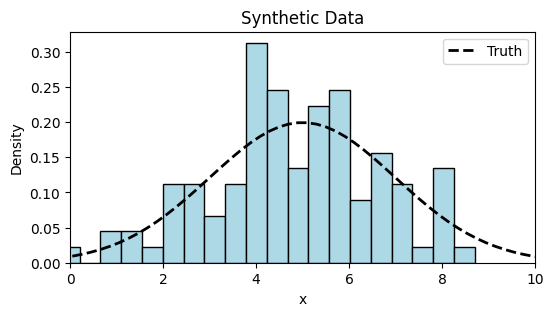

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Generate Synthetic Data
np.random.seed(42)
true_mu = 5
true_sigma = 2
data = np.random.normal(true_mu, true_sigma, size=100)

# Visualize the Synthetic Data
plt.figure(figsize=(6, 3))
plt.title("Synthetic Data")

plt.hist(data, bins=20, edgecolor="k", density=True, color="lightblue")

x = np.linspace(-5, 15, 100)
plt.plot(x, norm.pdf(x, true_mu, true_sigma), "k", ls="dashed", linewidth=2, label="Truth")

plt.xlim(0, 10)
plt.ylabel("Density")
plt.xlabel("x")

plt.legend()
plt.show()

To estimate the posterior distribution of our model parameters we need to define the likelihood and certain prior beliefs.

1. **Likelihood:**  
    $$x_i \sim \mathcal{N}(\mu, \sigma)$$
    The likelihood measures how plausible the observed data is for different values of the parameters. And as we assume our data to be normal distributed the likelihood is aswell.
2. **Priors:**

    $$\mu \sim \mathcal{N}(0, 10)$$
    Before observing any data, we believe that the mean is likely near 0 but has also a chance to be something else depending on the given standard deviation. The larger the standard deviation the more uncertain we are about its prior belief.

    $$\sigma \sim \text{Uniform}(0, 10)$$
    Before observing any data, we believe all values of the standard deviation between 0 and 10 are equally likely.

In [4]:
from scipy.stats import uniform


def log_prior(mu: float, sigma: float) -> float:
    if sigma <= 0:
        return -np.inf
    prior_mu = norm.logpdf(mu, 0, 10)
    prior_sigma = uniform.logpdf(sigma, 0, 10)
    return prior_mu + prior_sigma


def log_likelihood(mu: float, sigma: float, data: np.ndarray) -> float:
    return np.sum(norm.logpdf(data, mu, sigma))


def log_posterior(mu: float, sigma: float, data: np.ndarray) -> float:
    return log_likelihood(mu, sigma, data) + log_prior(mu, sigma)

We’ll compute the posterior:
    $$P(\mu, \sigma | \text{data}) \propto P(\text{data} | \mu, \sigma) \, P(\mu) \, P(\sigma)$$

As we use log likelihoods and log priors this transforms to the log posterior:
    $$\mathcal{L}_P(\mu, \sigma | \text{data}) \propto \mathcal{L}_P(\text{data} | \mu, \sigma) + \mathcal{L}_P(\mu) + \mathcal{N}_P(\sigma)$$

No we evaluate the posterior on a grid of $(\mu, \sigma)$ values to visualize how Bayesian inference updates our beliefs.

In [5]:
# Parameter Ranges
mu_vals = np.linspace(0, 10, 100)
sigma_vals = np.linspace(0.1, 5, 100)

# Empty Posterior Grid
posterior = np.zeros((len(mu_vals), len(sigma_vals)))

# Parameter Sampling
for i, mu in enumerate(mu_vals):
    for j, sigma in enumerate(sigma_vals):
        posterior[i, j] = log_posterior(mu, sigma, data)

# Converting back from a log posterior and normalize it to get a proper discrete probabiltity distribution
posterior = np.exp(posterior - np.max(posterior))
posterior /= np.sum(posterior)

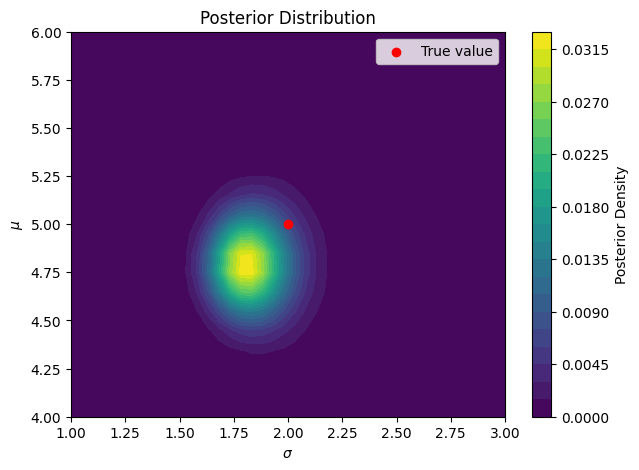

In [6]:
# Visualize the 2D Posterior
plt.figure(figsize=(7, 5))
plt.contourf(sigma_vals, mu_vals, posterior, levels=30, cmap="viridis")
plt.xlabel(r"$\sigma$")
plt.ylabel(r"$\mu$")
plt.title(r"Posterior Distribution")
plt.colorbar(label="Posterior Density")
plt.scatter(true_sigma, true_mu, color="red", label="True value")
plt.xlim(true_sigma - 1, true_sigma + 1)
plt.ylim(true_mu - 1, true_mu + 1)
plt.legend()
plt.show()

The final step is to marginalize over the joint posterior distribution.

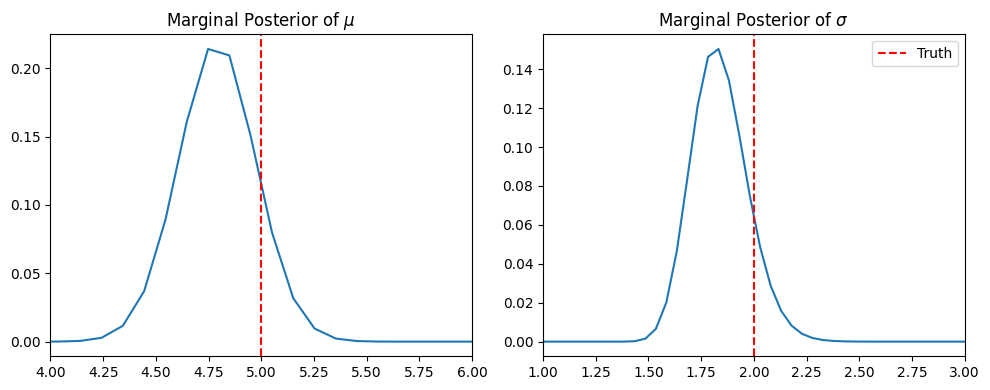

In [7]:
marginal_mu = posterior.sum(axis=1)  # sum up the standard deviation
marginal_sigma = posterior.sum(axis=0)  # sum up the mean

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(mu_vals, marginal_mu)
ax[0].axvline(true_mu, color="r", linestyle="--")
ax[0].set_xlim(true_mu - 1, true_mu + 1)
ax[0].set_title(r"Marginal Posterior of $\mu$")


ax[1].plot(sigma_vals, marginal_sigma)
ax[1].axvline(true_sigma, color="r", linestyle="--", label="Truth")
ax[1].set_xlim(true_sigma - 1, true_sigma + 1)
ax[1].set_title(r"Marginal Posterior of $\sigma$")
ax[1].legend()
plt.tight_layout()
plt.show()

Finally we compute the posterior mean for $\mu$ and $\sigma$. This can be doner either by calculate the expection value, i.e. the weighted average or by taking the value with highest probabilty. However latter can be misleading as the posterior distirbution might be non-symmetric (skewed or multiple peaks).

Posterior mean estimates:
mean ~ 4.79, standard deviation ~ 1.84


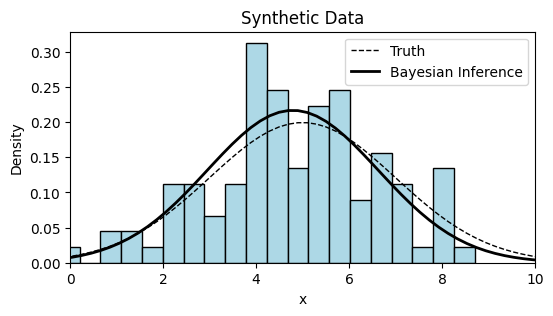

In [12]:
mu_est = np.sum(mu_vals * marginal_mu)
sigma_est = np.sum(sigma_vals * marginal_sigma)

print("Posterior mean estimates:")
print(fr"mean ~ {mu_est:.2f}, standard deviation ~ {sigma_est:.2f}")
plt.figure(figsize=(6, 3))
plt.title("Synthetic Data")

plt.hist(data, bins=20, edgecolor="k", density=True, color="lightblue")
plt.plot(x, norm.pdf(x, true_mu, true_sigma), "k", ls="dashed", linewidth=1, label="Truth")
plt.plot(x, norm.pdf(x, mu_est, sigma_est), "k", ls="solid", linewidth=2, label="Bayesian Inference")
plt.xlim(0, 10)
plt.ylabel("Density")
plt.xlabel("x")
plt.legend()
plt.show()

## 3. Bayesian Transformation - probly

Finally the question arises, how can we apply this knowledge to make models uncertainty aware?

The motivation behind this all is, that classical neural output single predictions. But how uncertain are these predictions? Instead of simply minimzing the loss function to adjust weights in the model and hence make predictions, Bayesian layers will learn distributions (simply speaking).

Lets see how **probly** does it. Again we start by creating synthetic data.

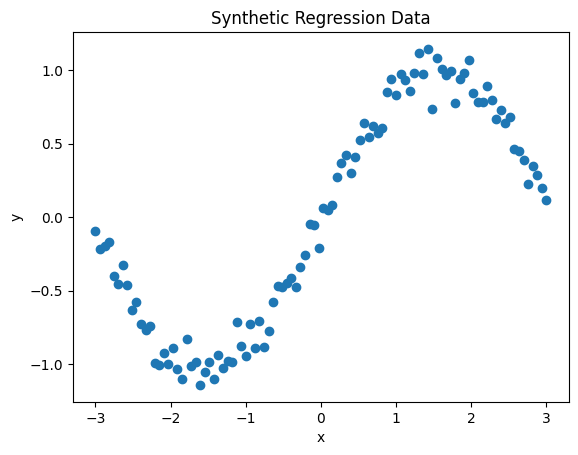

In [13]:
import torch
from torch import nn, optim

# Generate toy data: y = sin(x) + noise
np.random.seed(42)
x = np.linspace(-3, 3, 100).reshape(-1, 1)
y = np.sin(x) + 0.1 * np.random.randn(*x.shape)

# Convert to torch tensors
x_tensor = torch.from_numpy(x).float()
y_tensor = torch.from_numpy(y).float()

# Plot the data
plt.scatter(x, y)
plt.title("Synthetic Regression Data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

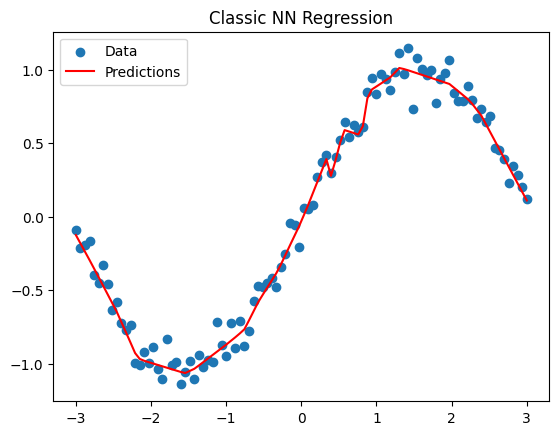

In [14]:
class ClassicNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 50)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x)


# Instantiate model, loss, optimizer
model = ClassicNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
for epoch in range(500):
    optimizer.zero_grad()
    output = model(x_tensor)
    loss = criterion(output, y_tensor)
    loss.backward()
    optimizer.step()

# Predictions
y_pred = model(x_tensor).detach().numpy()

# Plot
plt.scatter(x, y, label="Data")
plt.plot(x, y_pred, color="red", label="Predictions")
plt.title("Classic NN Regression")
plt.legend()
plt.show()

Lets convert each layer of the Network into bayesian layer from probly.

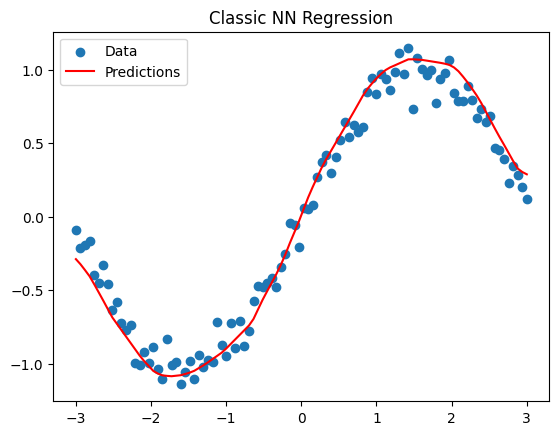

In [15]:
from probly.transformation import bayesian

model = bayesian(ClassicNN())
model.train()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
for epoch in range(500):
    optimizer.zero_grad()
    output = model(x_tensor)
    loss = nn.MSELoss()(output, y_tensor)
    loss.backward()
    optimizer.step()

# Predictions
y_pred = model(x_tensor).detach().numpy()
# Plot
plt.scatter(x, y, label="Data")
plt.plot(x, y_pred, color="red", label="Predictions")
plt.title("Classic NN Regression")
plt.legend()
plt.show()

In [16]:
from probly.layers.torch import BayesConv2d, BayesLinear


def posterior_summary(model):
    summaries = []
    for name, module in model.named_modules():
        if isinstance(module, BayesLinear) or isinstance(module, BayesConv2d):
            # posterior mean
            weight_mu = module.weight_mu.detach().cpu()
            # posterior std is stored via a transformed parameter `rho`
            weight_sigma = torch.log1p(torch.exp(module.weight_rho.detach().cpu()))
            summary = {
                "layer": name or module.__class__.__name__,
                "weight_mu_mean": float(weight_mu.mean()),
                "weight_mu_std": float(weight_mu.std()),
                "weight_post_sigma_mean": float(weight_sigma.mean()),
                "weight_post_sigma_std": float(weight_sigma.std()),
            }
            if getattr(module, "bias", False):
                bias_mu = module.bias_mu.detach().cpu()
                bias_sigma = torch.log1p(torch.exp(module.bias_rho.detach().cpu()))
                summary.update(
                    {
                        "bias_mu_mean": float(bias_mu.mean()),
                        "bias_mu_std": float(bias_mu.std()),
                        "bias_post_sigma_mean": float(bias_sigma.mean()),
                        "bias_post_sigma_std": float(bias_sigma.std()),
                    }
                )
            summaries.append(summary)
    return summaries


for s in posterior_summary(model):
    print(s)

{'layer': 'fc1', 'weight_mu_mean': 0.050627898424863815, 'weight_mu_std': 0.44214722514152527, 'weight_post_sigma_mean': 0.040194835513830185, 'weight_post_sigma_std': 0.0075193289667367935, 'bias_mu_mean': -0.327345609664917, 'bias_mu_std': 0.6505749821662903, 'bias_post_sigma_mean': 0.04322267696261406, 'bias_post_sigma_std': 0.007248041685670614}
{'layer': 'fc2', 'weight_mu_mean': -0.05857529863715172, 'weight_mu_std': 0.12217354029417038, 'weight_post_sigma_mean': 0.049183279275894165, 'weight_post_sigma_std': 0.0046344418078660965, 'bias_mu_mean': -0.0417797714471817, 'bias_mu_std': 0.1418345868587494, 'bias_post_sigma_mean': 0.04775457829236984, 'bias_post_sigma_std': 0.0055827549658715725}
{'layer': 'fc3', 'weight_mu_mean': 0.0006755575304850936, 'weight_mu_std': 0.09324757009744644, 'weight_post_sigma_mean': 0.04238445311784744, 'weight_post_sigma_std': 0.008469345048069954, 'bias_mu_mean': -0.08026877790689468, 'bias_mu_std': nan, 'bias_post_sigma_mean': 0.022840173915028572, 

C:\Users\jan-n\AppData\Local\Temp\ipykernel_23408\504550482.py:25: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\ReduceOps.cpp:1857.)
  "bias_mu_std": float(bias_mu.std()),
C:\Users\jan-n\AppData\Local\Temp\ipykernel_23408\504550482.py:27: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\ReduceOps.cpp:1857.)
  "bias_post_sigma_std": float(bias_sigma.std()),


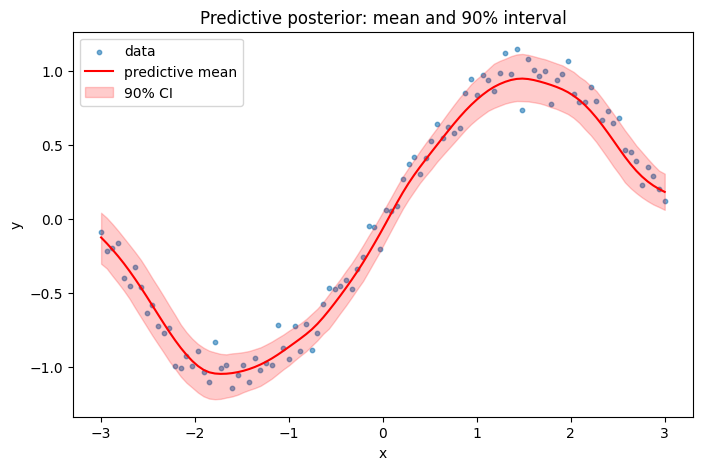

In [17]:
def predictive_posterior_samples(model, x_tensor, n_samples=500, device=None):
    """Return numpy array of predictive samples with shape (n_samples, batch, output_dim).
    The model's Bayesian layers sample internally on each forward pass, so multiple forwards approximate the posterior predictive.
    """
    # decide device safely
    try:
        params = list(model.parameters())
        device = device or (params[0].device if len(params) > 0 else torch.device("cpu"))
    except Exception:
        device = device or torch.device("cpu")
    model.eval()
    x = x_tensor.to(device)
    samples = []
    with torch.no_grad():
        for _ in range(n_samples):
            out = model(x)  # stochastic forward; Bayes layers resample weights each call
            samples.append(out.detach().cpu().numpy())
    samples = np.stack(samples, axis=0)
    return samples


# --- Run sampling ---
n_samples = 500
samples = predictive_posterior_samples(model, x_tensor, n_samples=n_samples)

# Compute summary statistics
mean = samples.mean(axis=0)  # shape (batch, output_dim)
std = samples.std(axis=0)
q05 = np.quantile(samples, 0.05, axis=0)
q95 = np.quantile(samples, 0.95, axis=0)

# Squeeze to 1D if outputs are single-valued per x
y_mean = mean.squeeze()
y_std = std.squeeze()
y_low = q05.squeeze()
y_high = q95.squeeze()

# --- Plot predictive mean with 90% interval ---
plt.figure(figsize=(8, 5))
plt.scatter(x, y, s=10, label="data", alpha=0.6)
plt.plot(x, y_mean, color="red", label="predictive mean")
plt.fill_between(x.flatten(), y_low, y_high, color="red", alpha=0.2, label="90% CI")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Predictive posterior: mean and 90% interval")
plt.legend()
plt.show()

Comment: We see that the model is now uncertainty aware. Note, that the uncertainty decreases the narrower the data points spread.